## Import Libraries

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Import the DataFiles

In [7]:
df_links = pd.read_csv('Data/links.csv')
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [8]:
df_movies = pd.read_csv('Data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
df_ratings = pd.read_csv('Data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
df_tags = pd.read_csv('Data/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Explatory Data Analysis

In [11]:
# view dimensions of dataset

df_links.shape

(9742, 3)

In [12]:
# view dimensions of dataset

df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [13]:
df_links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [14]:
df_movies.shape

(9742, 3)

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [16]:
df_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [17]:
df_ratings.shape

(100836, 4)

In [18]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [19]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [20]:
df_tags.shape

(3683, 4)

In [21]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [22]:
df_tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


### Data Cleaning

    We'll focus on handling missing values, converting timestamps, and preparing the text fields (genres and tag).

**1. Handling missing values**

    Lets check missing values and decide on how to handle them.

In [23]:
# Checking for missing values in each dataset
print("Missing values in df_links:")
print(df_links.isnull().sum())

print("\nMissing values in df_movies:")
print(df_movies.isnull().sum())

print("\nMissing values in df_ratings:")
print(df_ratings.isnull().sum())

print("\nMissing values in df_tags:")
print(df_tags.isnull().sum())


Missing values in df_links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing values in df_movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in df_ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in df_tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


    Since tmdbId has some missing values, we can either remove those rows or fill them in if we have extra data. For now, let's drop rows with missing tmdbId.

In [24]:
# Drop rows with missing tmdbId
df_links_cleaned = df_links.dropna(subset=['tmdbId'])


**1.2 Convert Timestamps**   

    Convert the timestamp columns in df_ratings and df_tags to a more readable date format.

In [25]:
# Convert timestamps in df_ratings and df_tags to datetime
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_tags['timestamp'] = pd.to_datetime(df_tags['timestamp'], unit='s')


**1.3 Text Preprocessing: Splitting Genres and Tags**  

    We'll split the genres column in df_movies into separate genres for analysis.

In [26]:
# Splitting genres into separate columns
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split('|'))


In [27]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


**1.4 Verifying the Data After Cleaning**  

    Let's check the structure of the cleaned data and make sure the missing values and conversions are handled correctly.

In [28]:
# Check the info of cleaned data
df_links_cleaned.info()
df_ratings.info()
df_tags.info()
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----

In [29]:
# Checking for duplicates
print("Duplicates in links:\n", df_links_cleaned.duplicated().sum())
print("Duplicates in ratings:\n", df_ratings.duplicated().sum())
print("Duplicates in tags:\n", df_tags.duplicated().sum())

Duplicates in links:
 0
Duplicates in ratings:
 0
Duplicates in tags:
 0


## **2. EDA**

**2.1 Distribution of Ratings**  

    We'll begin by visualizing the distribution of movie ratings to see how users have rated the movies.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


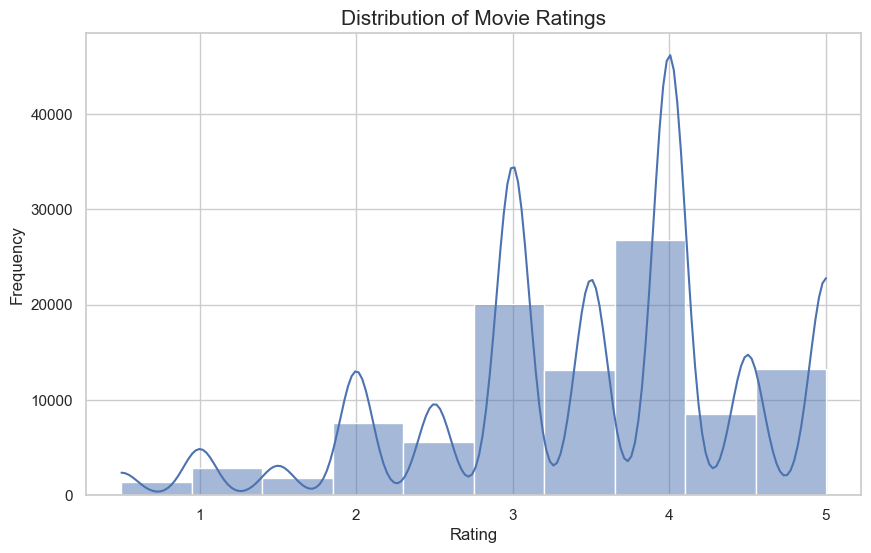

In [30]:

# Setting a style for the plots
sns.set(style="whitegrid")

# Plotting the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(df_ratings['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


    The ratings are highly concentrated around 4, with a peak between 3.5 and 4. This suggests that users generally tend to rate movies favorably, with 4 being the most frequent rating.   

    There is a clear tendency for users to give high ratings (between 3 and 5). Low ratings (below 2) are much less frequent, indicating that most movies are either liked or considered average by the users.     

**2. Popular Genres**   

    To analyze the popular genres, we'll extract individual genres from the df_movies dataset and count the occurrences.

In [31]:
# Check the first few rows of the genres column
print(df_movies['genres'].head(10))


0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
5                            [Action, Crime, Thriller]
6                                    [Comedy, Romance]
7                                [Adventure, Children]
8                                             [Action]
9                        [Action, Adventure, Thriller]
Name: genres, dtype: object


In [32]:
# Check for null or empty values in genres
print(df_movies['genres'].isnull().sum())  # Count of NaN values
print(df_movies[df_movies['genres'] == ''])  # Empty string check


0
Empty DataFrame
Columns: [movieId, title, genres]
Index: []


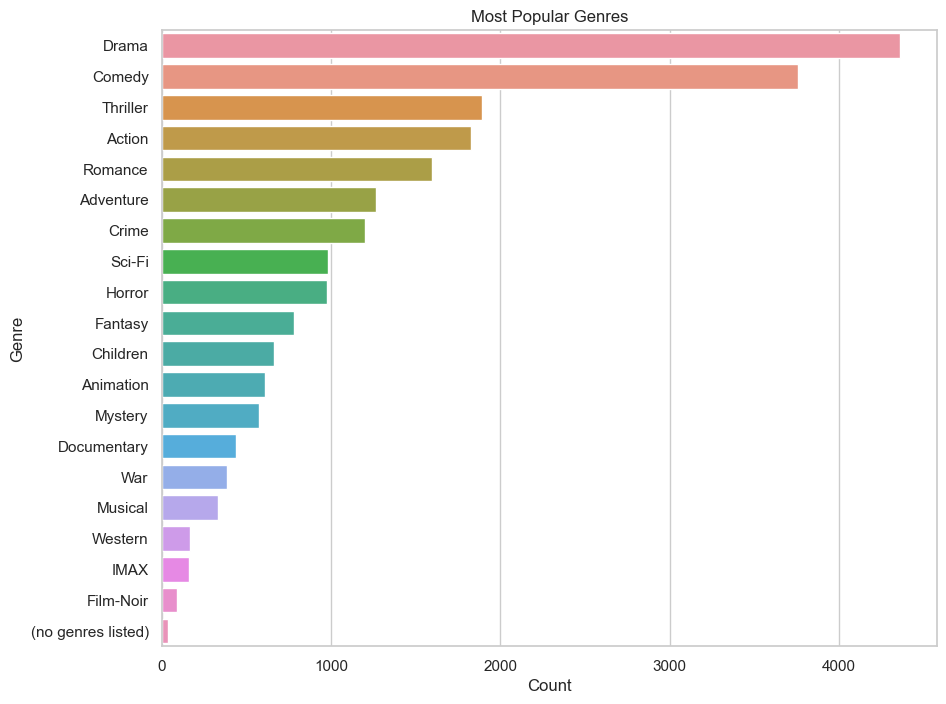

In [33]:
# Explode the list of genres into individual rows
genres = df_movies['genres'].explode()

# Plot the most popular genres
plt.figure(figsize=(10, 8))
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Most Popular Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [34]:
genres

0       Adventure
0       Animation
0        Children
0          Comedy
0         Fantasy
          ...    
9738      Fantasy
9739        Drama
9740       Action
9740    Animation
9741       Comedy
Name: genres, Length: 22084, dtype: object

`Drama` and `Comedy` are by far the most popular genres, with both appearing in over 4000 movies.     
`Thriller`, `Action`, and `Romance` are also popular, though with slightly fewer appearances.   
Genres like `War`, `Musical`, `Western`, and `IMAX` are much less frequent.  
There's a small portion of movies where no genres are listed, which might be worth investigating.   

**3. Movie Popularity (Most Rated Movies)**  

We'll find the most rated movies by grouping the ratings and counting how many ratings each movie received.

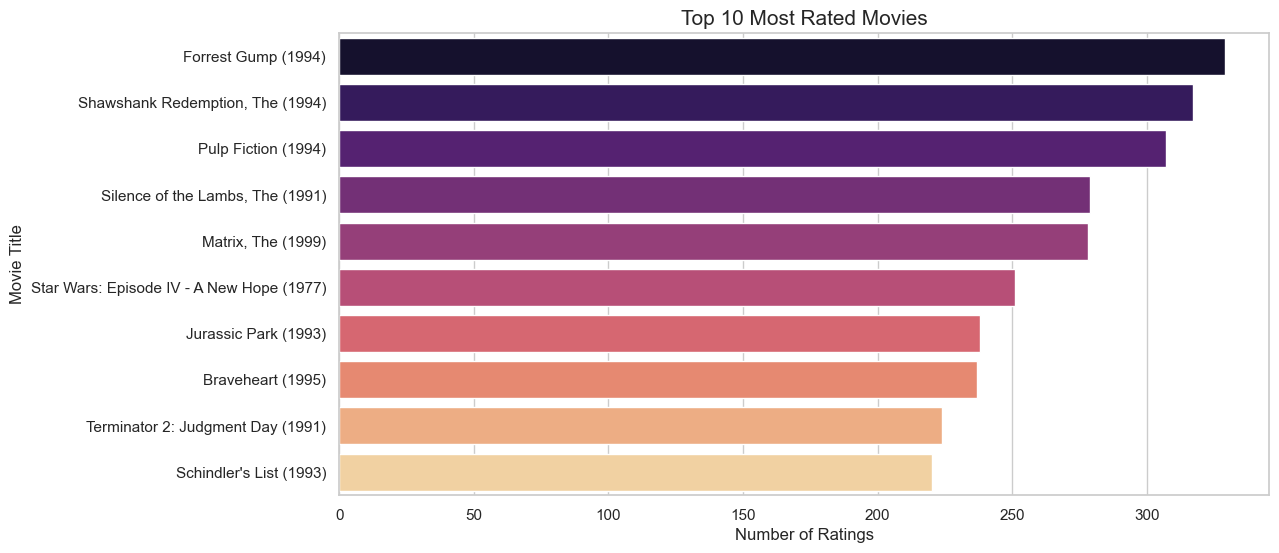

In [35]:
# Counting the number of ratings per movie
movie_ratings_count = df_ratings.groupby('movieId')['rating'].count().reset_index()
movie_ratings_count.columns = ['movieId', 'num_ratings']

# Merging with the movies dataset to get movie titles
popular_movies = pd.merge(movie_ratings_count, df_movies[['movieId', 'title']], on='movieId')

# Sorting by the number of ratings
popular_movies = popular_movies.sort_values(by='num_ratings', ascending=False).head(10)

# Plotting the top 10 most rated movies
plt.figure(figsize=(12,6))
sns.barplot(x='num_ratings', y='title', data=popular_movies, palette='magma')
plt.title('Top 10 Most Rated Movies', fontsize=15)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()


This plot showcases the Top 10 Most Rated Movies in the dataset:  

`Forrest Gump (1994)` is the most rated movie, with over 300 ratings, indicating its high popularity and significance among users.  
Other iconic movies like `Shawshank Redemption (1994)`, `Pulp Fiction (1994)`, and `Silence of the Lambs (1991)` also have a large number of ratings, reflecting their cultural impact and lasting relevance.  
`Movies like Matrix (1999)` and `Star Wars: Episode IV - A New Hope (1977)`, which belong to the sci-fi and adventure genres, show up as highly rated, underlining the strong fanbase for these genres.  

The range of movies spans from drama to action to historical epics, suggesting a diversity of preferences among users. Movies from different decades are represented as well, showing that both older and newer films maintain strong relevance. 

The presence of classics like `Schindler's List (1993)` and `Terminator 2: Judgment Day (1991)` points to the enduring appeal of certain genres like drama and action, with viewers continually revisiting these films.

**Calculate Average Ratings per Movie**   

    We already have the number of ratings per movie. Now, let's calculate the average rating for each movie. This will give us insights into the quality perception of movies.

**Create a User-Movie Interaction Matrix**   

    For collaborative filtering, we'll need to create a user-movie matrix where rows represent users, and columns represent movies. The values in the matrix will be the movie ratings by users.

### **Preprocessing Steps**

**Data Transformation**  

**Encoding the Genres (for content-based models):**    

    We may want to use multi-label binarization on genres for our  content-based filtering models

In [36]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [37]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Perform the binarization 
genres_binarized = pd.DataFrame(mlb.fit_transform(df_movies['genres']), 
                                columns=mlb.classes_, 
                                index=df_movies.index)

# Concatenate the binarized genres with the original df_movies
df_movies_clean = pd.concat([df_movies, genres_binarized], axis=1)




In [38]:
# sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()
#df_movies_clean = df_movies.join(pd.DataFrame(mlb.fit_transform(df_movies.pop('genres')), 
                                  #columns=mlb.classes_, 
                                  #index=df_movies.index))


In [39]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split   

# Create the user-movie matrix
user_movie_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 (movies not rated by the user)
user_movie_matrix_filled = user_movie_matrix.fillna(0)  



### KNN Model

**Build a Collaborative Filtering Model**   

We can use collaborative filtering techniques to recommend movies to users based on what similar users have rated. will start with K-Nearest Neighbors (KNN) to find similar users:

In [40]:
# Define the pipeline steps
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the user-movie matrix
    ('knn', NearestNeighbors(metric='cosine', algorithm='brute'))  # Step 2: Fit KNN model
])

In [41]:
train_users, test_users = train_test_split(user_movie_matrix.index, test_size=0.2, random_state=42) 

# Fit the pipeline with training data
pipeline_knn.fit(user_movie_matrix_filled.loc[train_users]) 



Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', NearestNeighbors(algorithm='brute', metric='cosine'))])

**Finding Nearest Neighbors**

In [42]:
# Get a specific user to recommend movies for
user_id = 300

# Find similar users to the selected user
user_index = user_movie_matrix.index.get_loc(user_id) 

# Get neighbors (similar users)
distances, indices = pipeline_knn.named_steps['knn'].kneighbors(user_movie_matrix_filled.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6)

# Display nearest neighbors
print("Distances to Neighbors:", distances)
print("Indices of Neighbors:", indices)

Distances to Neighbors: [[0.77610845 0.83664971 0.84115832 0.86324217 0.867091   0.86867285]]
Indices of Neighbors: [[265 116 264 411 214 455]]


**Generating Recommendations**

In [43]:
# Recommend movies for the selected user based on neighbors
neighbor_indices = indices.flatten()
neighbor_ratings = user_movie_matrix.iloc[neighbor_indices, :]

# Average the ratings from the neighbors
average_ratings = neighbor_ratings.mean(axis=0)

# Find the movies that the user hasn't watched
unwatched_movies = user_movie_matrix.iloc[user_index, :][user_movie_matrix.iloc[user_index, :].isna()]

# Recommend top 5 movies that the user hasn't watched
recommended_movies = average_ratings[unwatched_movies.index].sort_values(ascending=False).head(5)

# Merge with movie titles for clarity
recommended_movie_titles = pd.merge(recommended_movies.reset_index(), df_movies_clean[['movieId', 'title']], on='movieId')

# Display the recommended movies
print(recommended_movie_titles[['title', 0]])

                                    title    0
0                          Everest (1998)  5.0
1                        Chinatown (1974)  5.0
2                       Goldfinger (1964)  5.0
3  Monty Python and the Holy Grail (1975)  5.0
4               When We Were Kings (1996)  5.0


**Evaluation Metrics to Prove the Model's Performance**

In [44]:
# Get the recommended movie IDs
recommended_movie_ids = recommended_movies.index.tolist()  # Assuming index holds movie IDs

# Extract actual ratings for the recommended movies
actual_ratings = user_movie_matrix.loc[user_index, recommended_movie_ids]

# Predicted ratings 
predicted_ratings = average_ratings[recommended_movie_ids]


**Check if Recommended Movies Were Rated**   

    Before calculating RMSE,we have check if there are any valid entries in actual_ratings for the recommended movie IDs.

In [45]:
# Check the actual ratings for the recommended movies
print("Actual Ratings:")
print(actual_ratings)

# Check if any actual ratings are available for the recommended movies
if actual_ratings.isna().all():
    print("No actual ratings available for the recommended movies.")
else:
    print("Valid actual ratings:", actual_ratings[~actual_ratings.isna()])


Actual Ratings:
movieId
1797   NaN
1252   NaN
2947   NaN
1136   NaN
1147   NaN
Name: 299, dtype: float64
No actual ratings available for the recommended movies.


    we check the Length of Valid Ratings to make sure there are valid ratings before attempting to calculate RMSE.

In [46]:
# Filter out NaN values
valid_indices = ~actual_ratings.isna()
actual_ratings_valid = actual_ratings[valid_indices]
predicted_ratings_valid = predicted_ratings[valid_indices]

# Check if there are valid ratings
if actual_ratings_valid.shape[0] == 0 or predicted_ratings_valid.shape[0] == 0:
    print("Not enough valid ratings to calculate RMSE.")
else:
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual_ratings_valid, predicted_ratings_valid))
    print(f"Root Mean Squared Error: {rmse}")


Not enough valid ratings to calculate RMSE.


Since the model has indicated that there are not enough valid ratings to calculate the RMSE, it suggests that either:   

* The recommended movies have not been rated by the user, or
* All relevant ratings have been filtered out due to NaN values.

**Check Recommended Movies for Actual Ratings**

In [47]:
# Print the recommended movies
print("Recommended Movies:")
print(recommended_movie_titles[['title', 'movieId']])

# Check actual ratings for the recommended movies
actual_ratings_for_recommended = user_movie_matrix.loc[user_index, recommended_movie_titles['movieId']]

print("Actual Ratings for Recommended Movies:")
print(actual_ratings_for_recommended)


Recommended Movies:
                                    title  movieId
0                          Everest (1998)     1797
1                        Chinatown (1974)     1252
2                       Goldfinger (1964)     2947
3  Monty Python and the Holy Grail (1975)     1136
4               When We Were Kings (1996)     1147
Actual Ratings for Recommended Movies:
movieId
1797   NaN
1252   NaN
2947   NaN
1136   NaN
1147   NaN
Name: 299, dtype: float64


    Since the current recommendations do not have associated ratings, I considered providing fallback recommendations based on popular movies.

In [48]:
# Find the top N popular movies (based on average ratings)
popular_movies = df_ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).head(5)

# Merge with movie titles
popular_movie_titles = pd.merge(popular_movies.reset_index(), df_movies_clean[['movieId', 'title']], on='movieId')

print("Fallback: Recommended Popular Movies:")
print(popular_movie_titles[['title', 'rating']])


Fallback: Recommended Popular Movies:
                                   title  rating
0  Paper Birds (Pájaros de papel) (2010)     5.0
1             Act of Killing, The (2012)     5.0
2                        Jump In! (2007)     5.0
3                           Human (2015)     5.0
4                    L.A. Slasher (2015)     5.0


**Matrix Factorization with SVD (Singular Value Decomposition)**  

    We'll implement matrix factorization to find the latent factors representing users and movies.



**Building the SVD Model**   

    We'll use Scikit-learn's TruncatedSVD for dimensionality reduction.

In [49]:

# Create User-Item Matrix
user_item_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Split the data
train_data, test_data = train_test_split(df_ratings, test_size=0.2, random_state=42)
train_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)


**Create a Pipeline**

In [50]:
# Create a pipeline
from sklearn.decomposition import TruncatedSVD
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the data
    ('svd', TruncatedSVD())        # SVD model
])


**Set Up the Parameter Grid**

In [51]:
# Define the parameter grid
param_grid = {
    'svd__n_components': [10, 20, 30, 40, 50],  # Number of latent features to try
    'svd__random_state': [42]  # Setting random state for reproducibility
}


**Use GridSearchCV**

In [52]:
# Initialize GridSearchCV

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(train_matrix)

# Get the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because we used neg_mean_squared_error

print(f'Best Parameters: {best_params}')
print(f'Best RMSE Score: {np.sqrt(best_score)}')


KeyboardInterrupt: 

**Evaluate the Best Model**

In [165]:
# Get the best estimator
best_model = grid_search.best_estimator_

# Fit and transform the training data
train_matrix_reduced = best_model.named_steps['svd'].fit_transform(train_matrix)

# Reconstruct the user-item matrix
matrix_reconstructed = np.dot(train_matrix_reduced, best_model.named_steps['svd'].components_)
reconstructed_df = pd.DataFrame(matrix_reconstructed, index=train_matrix.index, columns=train_matrix.columns)

# Ensure the test matrix has the same columns as the training matrix
test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

# Transform the test data
test_matrix_reduced = best_model.named_steps['svd'].transform(test_matrix)

# Reconstruct the test data
test_matrix_reconstructed = np.dot(test_matrix_reduced, best_model.named_steps['svd'].components_)
reconstructed_test_df = pd.DataFrame(test_matrix_reconstructed, index=test_matrix.index, columns=test_matrix.columns)

# Calculate RMSE function
def calculate_rmse(predictions, test_data):
    actual = test_data.stack().reset_index(name='actual_rating')
    predicted_ratings = actual.apply(lambda row: predictions.loc[row['userId'], row['movieId']] 
                                       if row['userId'] in predictions.index and row['movieId'] in predictions.columns 
                                       else np.nan, axis=1)
    actual['predicted_rating'] = predicted_ratings
    actual.dropna(inplace=True)
    return np.sqrt(mean_squared_error(actual['actual_rating'], actual['predicted_rating'])) if not actual.empty else np.nan

# Calculate RMSE
rmse_value = calculate_rmse(reconstructed_test_df, test_matrix)
print(f'Test RMSE: {rmse_value}')


Test RMSE: 0.2101665968252184


In [166]:
#!pip install scikit-surprise

**Item-user-matrix**

In [62]:
item_user_matrix = user_item_matrix.T
item_user_matrix.isna().sum()


userId
1      0
2      0
3      0
4      0
5      0
      ..
606    0
607    0
608    0
609    0
610    0
Length: 610, dtype: int64

In [57]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Create a pipeline for KNN

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: Standardize the data
    ('knn', KNeighborsClassifier())        # Step 2: KNN Classifier
])


In [58]:
# Define the parameter grid
param_grid = {
    'svd__n_components': [10, 20, 30, 40, 50],  # Number of latent features to try
    'svd__random_state': [42]  # Setting random state for reproducibility
}


In [60]:
train_users, test_users = train_test_split(item_user_matrix.index, test_size=0.2, random_state=42) 

# Fit the pipeline with training data
pipeline_knn.fit(item_user_matrix.loc[train_users]) 



ValueError: This KNeighborsClassifier estimator requires y to be passed, but the target y is None.

In [ ]:
# Get a specific user to recommend movies for
user_id = 300

# Find similar users to the selected user
user_index = user_movie_matrix.index.get_loc(user_id) 

# Get neighbors (similar users)
distances, indices = pipeline_knn.named_steps['knn'].kneighbors(user_movie_matrix_filled.iloc[user_index, :].values.reshape(1, -1), n_neighbors=6)

# Display nearest neighbors
print("Distances to Neighbors:", distances)
print("Indices of Neighbors:", indices)

In [65]:
# Compute neighbors for all users
all_distances, all_indices = {}, {}

for movie_id, user_row in item_user_matrix.iterrows():
    distances, indices = pipeline_knn.named_steps['knn'].kneighbors(user_row.values.reshape(1, -1), n_neighbors=6)
    all_distances[movie_id] = distances
    all_indices[movie_id] = indices

# Display nearest neighbors for the first 5 users
for movie_id in list(item_user_matrix.index[:5]):
    print(f"movie ID: {movie_id}\nDistances: {all_distances[movie_id]}\nIndices: {all_indices[movie_id]}\n")


movie ID: 1
Distances: [[0.55703491 0.56314363 0.56830195 0.56920176 0.57925773 0.58938422]]
Indices: [[3091 6422 5972 5138 1753  849]]

movie ID: 2
Distances: [[0.10501797 0.53847999 0.58631818 0.58729067 0.6055678  0.61569581]]
Indices: [[6336 1753 4172 2200 4577 7218]]

movie ID: 3
Distances: [[0.13851979 0.63802318 0.67233352 0.67491208 0.67854685 0.68125736]]
Indices: [[3148 3044 1667 3091 7416  849]]

movie ID: 4
Distances: [[0.55273191 0.61011406 0.62121297 0.62658311 0.6291472  0.63440066]]
Indices: [[ 649 1828 3566 1003 2076 5327]]

movie ID: 5
Distances: [[0.12530923 0.57565021 0.58293888 0.60275708 0.61139506 0.61233642]]
Indices: [[7416 3044 2790 4456 3148 6357]]



### **SVD MODEL**

In [63]:
train_svd_data, test_svd_data = train_test_split(df_ratings, test_size=0.2, random_state=42)
train_svd_matrix = train_svd_data.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [64]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the data
    ('svd', TruncatedSVD())        # SVD model
])


In [65]:
# Define the parameter grid
param_grid = {
    'svd__n_components': [10, 20, 30, 40, 50],  # Number of latent features to try
    'svd__random_state': [42]  # Setting random state for reproducibility
}


In [66]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(train_svd_matrix)

# Get the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because we used neg_mean_squared_error

print(f'Best Parameters: {best_params}')
print(f'Best RMSE Score: {np.sqrt(best_score)}')


c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'svd__n_components': 10, 'svd__random_state': 42}
Best RMSE Score: nan


In [68]:
test_svd_matrix = test_svd_data.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [72]:
from sklearn.metrics import mean_squared_error

best_model = grid_search.best_estimator_

# Fit and transform the training data
train_matrix_reduced = best_model.named_steps['svd'].fit_transform(train_svd_matrix)

# Reconstruct the user-item matrix
matrix_reconstructed = np.dot(train_matrix_reduced, best_model.named_steps['svd'].components_)
reconstructed_df = pd.DataFrame(matrix_reconstructed, index=train_svd_matrix.index, columns=train_svd_matrix.columns)

# Ensure the test matrix has the same columns as the training matrix
test_svd_matrix = test_svd_matrix.reindex(columns=train_svd_matrix.columns, fill_value=0)

# Transform the test data
test_matrix_reduced = best_model.named_steps['svd'].transform(test_svd_matrix)

# Reconstruct the test data
test_matrix_reconstructed = np.dot(test_matrix_reduced, best_model.named_steps['svd'].components_)
reconstructed_test_df = pd.DataFrame(test_matrix_reconstructed, index=test_svd_matrix.index, columns=test_svd_matrix.columns)

# Calculate RMSE function
def calculate_rmse(predictions, test_data):
    actual = test_data.stack().reset_index(name='actual_rating')
    predicted_ratings = actual.apply(lambda row: predictions.loc[row['userId'], row['movieId']] 
                                       if row['userId'] in predictions.index and row['movieId'] in predictions.columns 
                                       else np.nan, axis=1)
    actual['predicted_rating'] = predicted_ratings
    actual.dropna(inplace=True)
    return np.sqrt(mean_squared_error(actual['actual_rating'], actual['predicted_rating'])) if not actual.empty else np.nan

# Calculate RMSE
rmse_value = calculate_rmse(reconstructed_test_df, test_svd_matrix)
print(f'Test RMSE: {rmse_value}')


Test RMSE: 0.46014502614374914


### **Content Based Filtering**

In [77]:

df_movies_exploded = df_movies.explode('genres')

# Display the exploded DataFrame
df_movies_exploded.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [ ]:

# Join the list of genres into a single string
df_movies['genres'] = df_movies['genres'].apply(lambda x: ' '.join(x))
df_movies['genres'].head()

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics.pairwise import linear_kernel


In [91]:
# Define the TF-IDF Vectorizer and remove stop words (optional)
tfidf = TfidfVectorizer(stop_words='english')

# Apply the TF-IDF on the genres column
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

# Check the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(9742, 23)


**Compute Cosine Similarity**

In [92]:
# Compute cosine similarity between all movies in the dataset
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Display shape of cosine similarity matrix
print(cosine_sim.shape)


(9742, 9742)


**Create a Reverse Lookup for Movie Titles**

In [93]:
# Create a reverse map of indices and movie titles
indices = pd.Series(df_movies.index, index=df_movies['title']).drop_duplicates()

# Check reverse lookup mapping
indices.head(10)


title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
Heat (1995)                           5
Sabrina (1995)                        6
Tom and Huck (1995)                   7
Sudden Death (1995)                   8
GoldenEye (1995)                      9
dtype: int64

**Building the Recommendation Function**

In [94]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_movies['title'].iloc[movie_indices]


**Testing the Recommendation System**

In [95]:
# Loop through all movie titles and print the recommendations for each movie
def get_all_recommendations(n_recommendations=5):
    for title in df_movies['title']:
        # Check if the movie title is in the indices dictionary
        if title in indices:
            print(f"\nRecommendations for '{title}':")
            try:
                # Get top 'n_recommendations' similar movies
                recommendations = get_recommendations(title).head(n_recommendations)
                print(recommendations)
            except IndexError as e:
                print(f"Error generating recommendations for '{title}': {e}")
        else:
            print(f"\n'{title}' not found in indices.")

# Test by generating recommendations for all movies
get_all_recommendations(5)  # Adjust the number of recommendations as needed



Recommendations for 'Toy Story (1995)':
1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object

Recommendations for 'Jumanji (1995)':
53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object

Recommendations for 'Grumpier Old Men (1995)':
6                          Sabrina (1995)
35                        Clueless (1995)
57                   Two if by Sea (1996)
60     French Twist (Gazon maudit) (1995)
103                   If Lucy Fell (1996)
Name: title, dtype: object

Recommendations for 'Waiting to Exhale (1995)':
10     

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [96]:
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")
print(f"Number of movies in dataset: {df_movies.shape[0]}")


Cosine similarity matrix shape: (9742, 9742)
Number of movies in dataset: 9742


In [97]:
def get_recommendations(title, cosine_sim=cosine_sim, n_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        print(f"Movie '{title}' not found.")
        return pd.Series()

    sim_scores = sorted(enumerate(cosine_sim[idx]), key=lambda x: x[1], reverse=True)[1:n_recommendations+1]
    return df_movies['title'].iloc[[i[0] for i in sim_scores]]


In [98]:
def get_all_recommendations(n_recommendations=5):
    for title in df_movies['title']:
        recommendations = get_recommendations(title, n_recommendations=n_recommendations)
        print(f"\nRecommendations for '{title}':")
        print(recommendations if not recommendations.empty else "No recommendations found.")

# Test by generating recommendations for all movies
get_all_recommendations(5)



Recommendations for 'Toy Story (1995)':
1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object

Recommendations for 'Jumanji (1995)':
53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object

Recommendations for 'Grumpier Old Men (1995)':
6                          Sabrina (1995)
35                        Clueless (1995)
57                   Two if by Sea (1996)
60     French Twist (Gazon maudit) (1995)
103                   If Lucy Fell (1996)
Name: title, dtype: object

Recommendations for 'Waiting to Exhale (1995)':
10     

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [99]:
def get_recommendations(title, cosine_sim=cosine_sim, n_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        print(f"Movie '{title}' not found.")
        return pd.Series()

    sim_scores = cosine_sim[idx]  # Get similarity scores for the movie
    sim_scores = list(enumerate(sim_scores))  # Create a list of (index, score) pairs
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]  # Sort and get top recommendations

    return df_movies['title'].iloc[[i[0] for i in sim_scores]]


In [100]:
def get_all_recommendations(n_recommendations=5):
    for title in df_movies['title']:
        recommendations = get_recommendations(title, n_recommendations=n_recommendations)
        print(f"\nRecommendations for '{title}':")
        print(recommendations if not recommendations.empty else "No recommendations found.")

# Test by generating recommendations for all movies
get_all_recommendations(5)



Recommendations for 'Toy Story (1995)':
1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object

Recommendations for 'Jumanji (1995)':
53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object

Recommendations for 'Grumpier Old Men (1995)':
6                          Sabrina (1995)
35                        Clueless (1995)
57                   Two if by Sea (1996)
60     French Twist (Gazon maudit) (1995)
103                   If Lucy Fell (1996)
Name: title, dtype: object

Recommendations for 'Waiting to Exhale (1995)':
10     

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create Count Vectorizer
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), stop_words='english')
count_matrix = count_vectorizer.fit_transform(df_movies['genres'])

# Calculate Cosine Similarity
cosine_sim = cosine_similarity(count_matrix)

# Create an index mapping
indices = pd.Series(df_movies.index, index=df_movies['title']).to_dict()

# Recommendation function
def get_recommendations(title, n_recommendations=5):
    idx = indices.get(title)
    if idx is None:
        print(f"Movie '{title}' not found.")
        return pd.Series()

    sim_scores = list(enumerate(cosine_sim[idx]))  # Create a list of (index, score) pairs
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n_recommendations+1]  # Sort and get top recommendations
    
    # Get the movie titles for the top indices
    movie_indices = [i[0] for i in sim_scores]
    return df_movies['title'].iloc[movie_indices]

# Function to generate recommendations for all movies
def get_all_recommendations(n_recommendations=5):
    for title in df_movies['title']:
        recommendations = get_recommendations(title, n_recommendations=n_recommendations)
        print(f"\nRecommendations for '{title}':")
        print(recommendations if not recommendations.empty else "No recommendations found.")

# Test by generating recommendations for all movies
get_all_recommendations(5)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Recommendations for 'Toy Story (1995)':
1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object

Recommendations for 'Jumanji (1995)':
53             Indian in the Cupboard, The (1995)
109             NeverEnding Story III, The (1994)
767               Escape to Witch Mountain (1975)
1514    Darby O'Gill and the Little People (1959)
1556                          Return to Oz (1985)
Name: title, dtype: object

Recommendations for 'Grumpier Old Men (1995)':
6                          Sabrina (1995)
35                        Clueless (1995)
57                   Two if by Sea (1996)
60     French Twist (Gazon maudit) (1995)
103                   If Lucy Fell (1996)
Name: title, dtype: object

Recommendations for 'Waiting to Exhale (1995)':
10     

**Cosine Similarity Score Distribution**

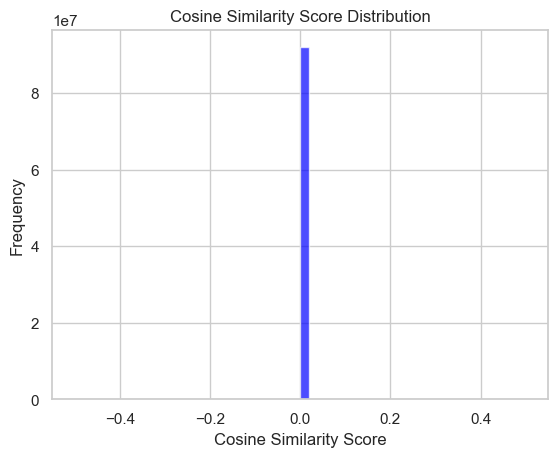

In [106]:
import matplotlib.pyplot as plt

def plot_similarity_distribution():
    # Flatten the cosine similarity matrix and remove diagonal values (self-similarity)
    sim_scores = cosine_sim.flatten()
    sim_scores = sim_scores[sim_scores < 1]  # Remove self-similarities (score of 1)
    
    plt.hist(sim_scores, bins=50, color='blue', alpha=0.7)
    plt.title('Cosine Similarity Score Distribution')
    plt.xlabel('Cosine Similarity Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot cosine similarity score distribution
plot_similarity_distribution()
